# Visualizacion de regiones abiertas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import random

## FRANJA

PASO 1. Definir nuestra region de interes

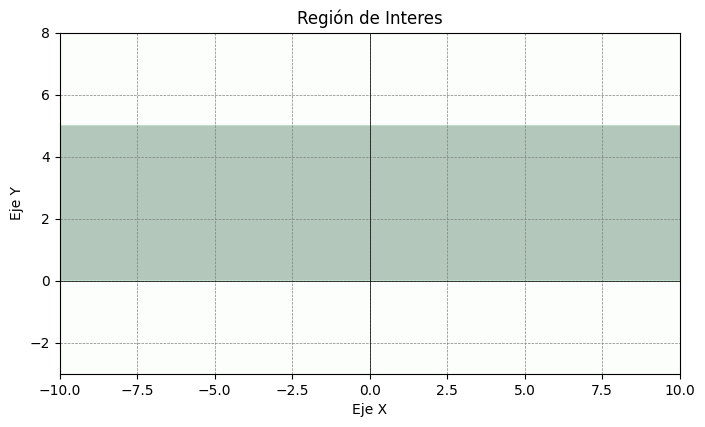

In [ ]:
# Creamos una malla de puntos en el plano
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

abajo = 0
arriba = 5

# Definimos las desigualdades
condicion1 = Y > abajo
condicion2 = Y < arriba #linea horizontal en arriba
#condicion3 = X**2 + Y**2 < 9 #circulo centrado en 5 de radio 3

# Combinamos las condiciones para la región deseada
region = np.logical_and(condicion1, condicion2)
#region = np.logical_and(region, condicion3)

# Graficamos la región
plt.figure(figsize=(8, 6))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interes')
plt.xlim(-10,10)
plt.ylim(abajo-3,arriba+3)
plt.show()

PASO 2. Generar puntos aleatorios dentro de la region.

In [ ]:
num_puntos = 500
puntos=[]

for i in range(num_puntos):
  x_i=np.random.uniform(-10,10)
  y_i=np.random.uniform(abajo,arriba)
  puntos.append((x_i,y_i))

#print(puntos)
print(len(puntos))

500


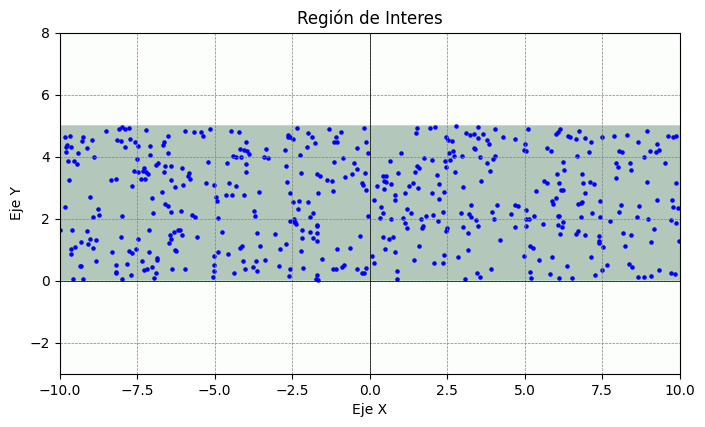

In [ ]:
# Graficamos la región y los puntos generados
plt.figure(figsize=(8, 6))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

# Graficamos los puntos aleatorios
puntos_x, puntos_y = zip(*puntos)
plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interes')
plt.xlim(-10,10)
plt.ylim(abajo-3,arriba+3)
plt.show()

PASO 3. Medir la distancia del punto a los bordes de a franja

In [ ]:
def distancia_minima(punto, abajo, arriba):
  """
  Calcula la distancia mínima de un punto a los bordes de una franja.
  """
  x, y = punto
  distancia_abajo = abs(y - abajo)
  distancia_arriba = abs(y - arriba)
  return min(distancia_abajo, distancia_arriba)

# Ejemplo de uso
punto_ejemplo = (2, 4)
distancia = distancia_minima(punto_ejemplo, abajo, arriba)
print("La distancia mínima del punto al borde es:", distancia)


La distancia mínima del punto al borde es: 1


In [42]:
radios=[]
for punto in puntos:
  #print("El punto es:", punto)
  distancia = distancia_minima(punto, abajo, arriba)
  #print("Su distancia es:",distancia)
  if distancia < 0.1: #si esta muy cerca del borde
    rad = 0
    radios.append(0)
  else:
    rad = random.uniform(0.1, distancia)
    radios.append(rad)
  #print("El radio es:",rad)

#print(radios)
print(len(radios))
print(len(puntos))



500
500


PASO 4. Generar bolas dado el centro y el radio

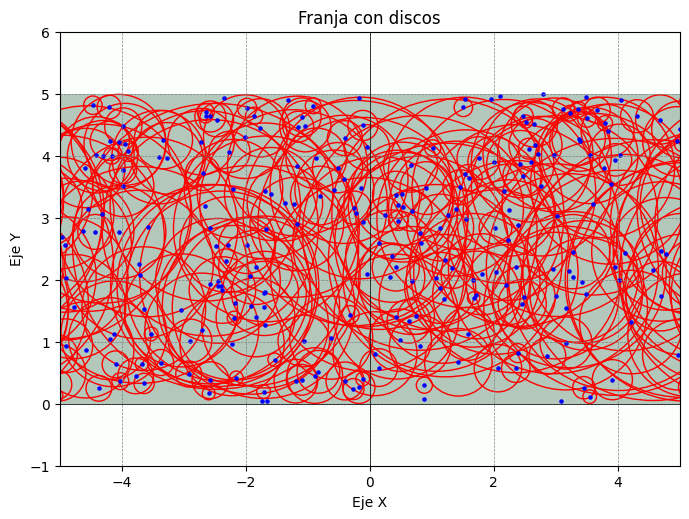

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

# Creamos una malla de puntos para la bola
for i in range(num_puntos):
  centro = puntos[i]
  radio = radios[i]
  circle =patches.Circle(centro, radio, color='red', fill=False)
  ax.add_patch(circle)

# Graficamos los puntos aleatorios
plt.scatter(puntos_x, puntos_y, color='blue', s=5)

# Graficamos las bolas
#for bola in bolas:
  #plt.plot(bola[0], bola[1], color='red', linewidth=1)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
#plt.title('Región de Interes con Bolas')
plt.title('Franja con discos')
#plt.xlim(-10,10)
plt.xlim(-5,5)
plt.ylim(abajo-1,arriba+1)
#plt.axes().set_aspect('equal')
plt.show()

## Elipse

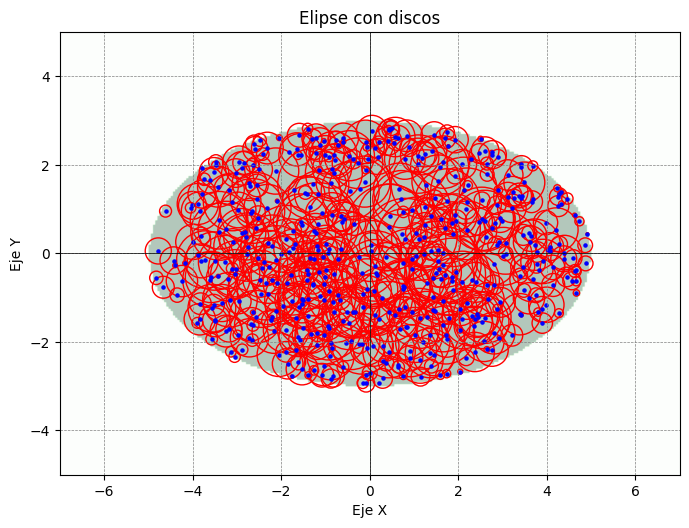

In [44]:
#creamos una malla
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Parámetros de la elipse
a = 5  # Semieje mayor
b = 3  # Semieje menor

# Ecuación de la elipse
condicion = (X**2 / a**2) + (Y**2 / b**2) <= 1

'''
# Graficar la región
plt.figure(figsize=(8, 6))
plt.imshow(condicion, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interés (Elipse)')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
'''

# Generar puntos aleatorios dentro de la elipse
num_puntos = 500
puntos = []

while len(puntos) < num_puntos:
    x_i = np.random.uniform(-a, a)
    y_i = np.random.uniform(-b, b)
    if (x_i**2 / a**2) + (y_i**2 / b**2) <= 1:
        puntos.append((x_i, y_i))

'''
# Graficar la región y los puntos generados
plt.figure(figsize=(8, 6))
plt.imshow(condicion, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)
'''

# Graficar los puntos aleatorios
puntos_x, puntos_y = zip(*puntos)
'''
plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interés (Elipse) con Puntos')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
'''

# Calcular la distancia mínima de un punto al borde de la elipse
def distancia_minima_elipse(punto, a, b):
    x, y = punto
    return abs(1 - (x**2 / a**2) - (y**2 / b**2))**0.5

# Calcular radios para las bolas
radios = []
for punto in puntos:
    distancia = distancia_minima_elipse(punto, a, b)
    if distancia < 0.01:
        rad = 0
    else:
        rad = random.uniform(0.01, distancia)
    radios.append(rad)

# Generar bolas y graficarlas
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(condicion, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

for i in range(num_puntos):
    centro = puntos[i]
    radio = radios[i]
    circle = patches.Circle(centro, radio, color='red', fill=False)
    ax.add_patch(circle)

plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Elipse con discos')
plt.xlim(-a-2, a+2)
plt.ylim(-b-2, b+2)
plt.show()

## Rectangulo

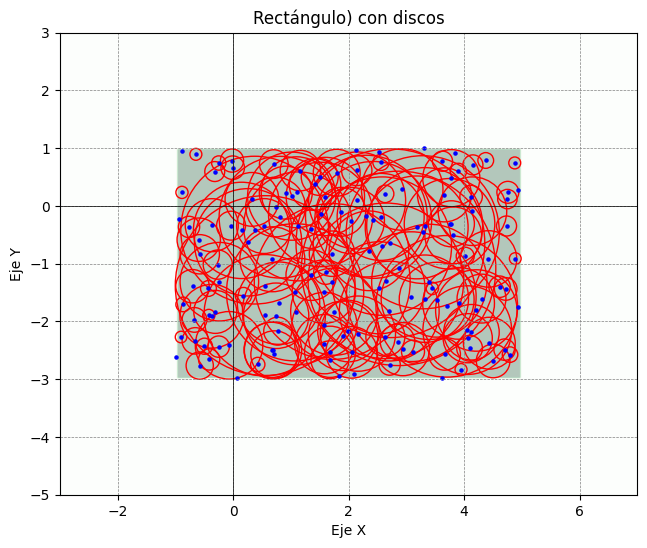

In [45]:

# Parámetros del rectángulo
centro_x = 2  # Coordenada x del centro
centro_y = -1  # Coordenada y del centro
ancho = 6  # Ancho del rectángulo
alto = 4  # Alto del rectángulo

# Creamos una malla de puntos en el plano
x = np.linspace(centro_x - ancho - 5, centro_x + ancho + 5, 400)
y = np.linspace(centro_y - alto - 5, centro_y + alto + 5, 400)
X, Y = np.meshgrid(x, y)

# Definimos las desigualdades
condicion1 = X > centro_x - ancho / 2
condicion2 = X < centro_x + ancho / 2
condicion3 = Y > centro_y - alto / 2
condicion4 = Y < centro_y + alto / 2

# Combinamos las condiciones para la región deseada
region = np.logical_and(condicion1, condicion2)
region = np.logical_and(region, condicion3)
region = np.logical_and(region, condicion4)

'''
# Graficamos la región
plt.figure(figsize=(8, 6))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interes')
plt.xlim(centro_x - ancho - 2, centro_x + ancho + 2)
plt.ylim(centro_y - alto - 2, centro_y + alto + 2)
plt.show()
'''

# Generar puntos aleatorios dentro del rectángulo
num_puntos = 150
puntos=[]

for i in range(num_puntos):
  x_i = np.random.uniform(centro_x - ancho / 2, centro_x + ancho / 2)
  y_i = np.random.uniform(centro_y - alto / 2, centro_y + alto / 2)
  puntos.append((x_i, y_i))

'''
# Graficamos la región y los puntos generados
plt.figure(figsize=(8, 6))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)
'''

# Graficamos los puntos aleatorios
puntos_x, puntos_y = zip(*puntos)
'''
plt.scatter(puntos_x, puntos_y, color='blue', s=5)


plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interes')
plt.xlim(centro_x - ancho - 2, centro_x + ancho + 2)
plt.ylim(centro_y - alto - 2, centro_y + alto + 2)
plt.show()
'''

# Calcular la distancia mínima de un punto al borde del rectángulo
def distancia_minima_rectangulo(punto, centro_x, centro_y, ancho, alto):
  x, y = punto
  distancia_izquierda = abs(x - (centro_x - ancho / 2))
  distancia_derecha = abs(x - (centro_x + ancho / 2))
  distancia_abajo = abs(y - (centro_y - alto / 2))
  distancia_arriba = abs(y - (centro_y + alto / 2))
  return min(distancia_izquierda, distancia_derecha, distancia_abajo, distancia_arriba)

# Calcular radios para las bolas
radios = []
for punto in puntos:
  distancia = distancia_minima_rectangulo(punto, centro_x, centro_y, ancho, alto)
  if distancia < 0.1:
    rad = 0
  else:
    rad = random.uniform(0.1, distancia)
  radios.append(rad)

# Generar bolas y graficarlas
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

for i in range(num_puntos):
  centro = puntos[i]
  radio = radios[i]
  circle = patches.Circle(centro, radio, color='red', fill=False)
  ax.add_patch(circle)

plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Rectángulo) con discos')
plt.xlim(centro_x - ancho/2 - 2, centro_x + ancho/2 + 2)
plt.ylim(centro_y - alto/2 - 2, centro_y + alto/2 + 2)
plt.show()


## Semiplano derecho

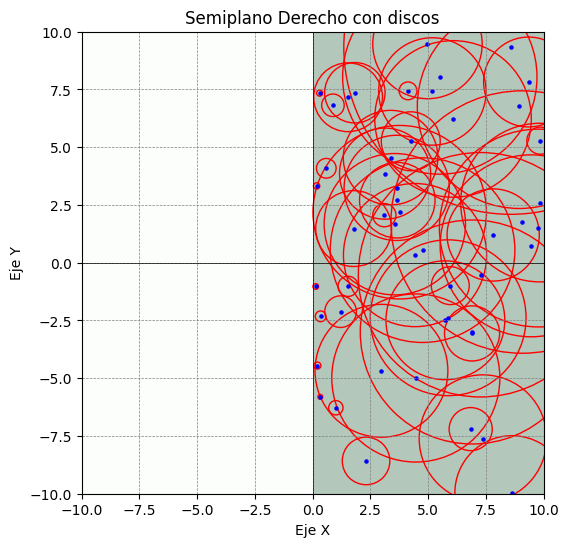

In [47]:

# Creamos una malla de puntos en el plano
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Definimos la desigualdad
condicion = X >= 0  # Semiplano derecho

# Combinamos las condiciones para la región deseada
region = condicion

'''
# Graficamos la región
plt.figure(figsize=(8, 6))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interes')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
'''
# Generar puntos aleatorios dentro del semiplano derecho
num_puntos = 50
puntos=[]

for i in range(num_puntos):
  x_i = np.random.uniform(0, 10)
  y_i = np.random.uniform(-10, 10)
  puntos.append((x_i, y_i))

'''
# Graficamos la región y los puntos generados
plt.figure(figsize=(8, 6))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)
'''

# Graficamos los puntos aleatorios
puntos_x, puntos_y = zip(*puntos)
'''
plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interes')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
'''

# Calcular la distancia mínima de un punto al borde del semiplano derecho
def distancia_minima_semiplano(punto):
  x, y = punto
  return x  # La distancia es simplemente la coordenada x

# Calcular radios para las bolas
radios = []
for punto in puntos:
  distancia = distancia_minima_semiplano(punto)
  if distancia < 0.1:
    rad = 0
  else:
    rad = random.uniform(0.1, distancia)
  radios.append(rad)

# Generar bolas y graficarlas
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

for i in range(num_puntos):
  centro = puntos[i]
  radio = radios[i]
  circle = patches.Circle(centro, radio, color='red', fill=False)
  ax.add_patch(circle)

plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Semiplano Derecho con discos')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

Funcion diferenciable y eje de las x

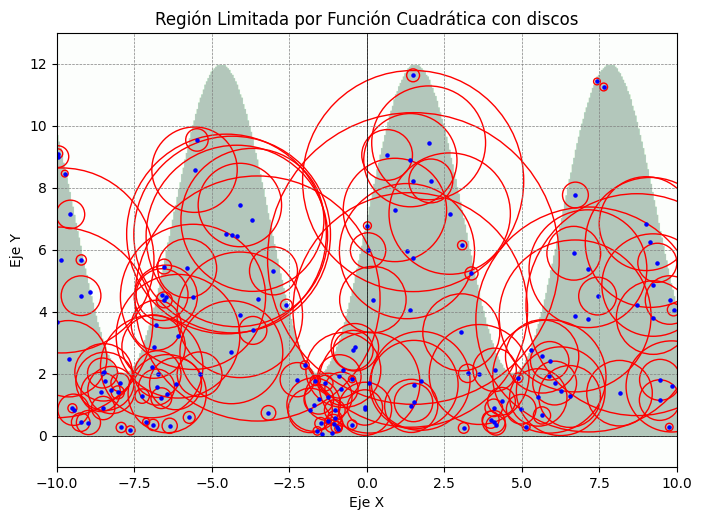

In [46]:

# Definir la función cuadrática
def f(x):
  #return np.exp(x)  # Ejemplo de función cuadrática
  return 5*np.sin(x)+7


# Creamos una malla de puntos en el plano
x = np.linspace(-10, 10, 400)
y = np.linspace(-1, 20, 400)
X, Y = np.meshgrid(x, y)

# Definimos las desigualdades
condicion1 = Y >= 0  # Por encima del eje x
condicion2 = Y <= f(X)  # Por debajo de la función cuadrática

# Combinamos las condiciones para la región deseada
region = np.logical_and(condicion1, condicion2)

'''
# Graficamos la región
plt.figure(figsize=(8, 6))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interes')
plt.xlim(-5, 5)
plt.ylim(-5, 10)
plt.show()
'''

# Generar puntos aleatorios dentro de la región
num_puntos = 150
puntos = []

while len(puntos) < num_puntos:
  x_i = np.random.uniform(-10, 10)
  y_i = np.random.uniform(0, f(x_i))
  puntos.append((x_i, y_i))

'''
# Graficamos la región y los puntos generados
plt.figure(figsize=(8, 6))
plt.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)
'''

# Graficamos los puntos aleatorios
puntos_x, puntos_y = zip(*puntos)
'''
plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interes')
plt.xlim(-5, 5)
plt.ylim(-5, 10)
plt.show()
'''

# Calcular la distancia mínima de un punto al borde de la región
def distancia_minima_cuadratica(punto):
  x, y = punto
  distancia_eje_x = y
  distancia_funcion = abs(y - f(x))
  distancia_latder = abs(x - 5)
  distancia_latizq = abs(x + 5)
  return min(distancia_eje_x, distancia_funcion)

# Calcular radios para las bolas
radios = []
for punto in puntos:
  distancia = distancia_minima_cuadratica(punto)
  if distancia < 0.1:
    rad = 0
  else:
    rad = random.uniform(0.1, distancia)
  radios.append(rad)

# Generar bolas y graficarlas
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

for i in range(num_puntos):
  centro = puntos[i]
  radio = radios[i]
  circle = patches.Circle(centro, radio, color='red', fill=False)
  ax.add_patch(circle)

plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región Limitada por Función Cuadrática con discos')
plt.xlim(-10, 10)
plt.ylim(-1, 13)
plt.show()


El ejemplo anterior **NO** toma en cuenta la distancia hacia la izquierda o derecha de la region.


NOTA: Es muy importante **acotar de forma correcta el radio.**

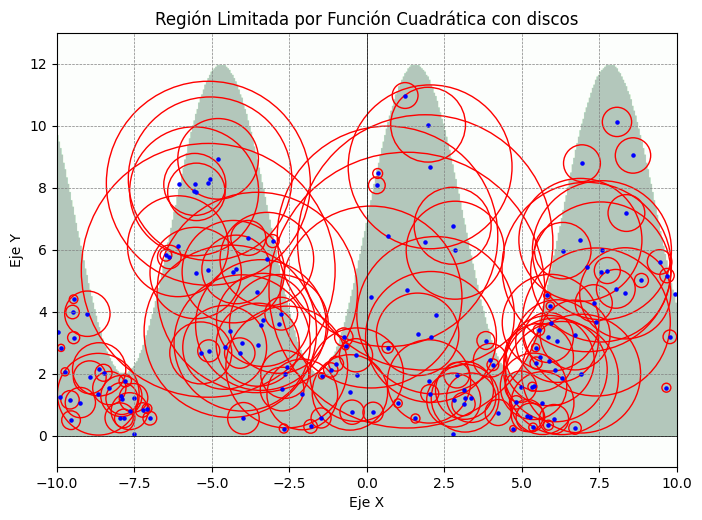

In [ ]:


# Creamos una malla de puntos en el plano
x = np.linspace(-10, 10, 400)
y = np.linspace(-1, 20, 400)
X, Y = np.meshgrid(x, y)

# Definimos las desigualdades
condicion1 = Y >= 0  # Por encima del eje x
condicion2 = Y <= f(X)  # Por debajo de la función cuadrática

# Combinamos las condiciones para la región deseada
region = np.logical_and(condicion1, condicion2)

# Generar puntos aleatorios dentro de la región
num_puntos = 150
puntos = []

while len(puntos) < num_puntos:
  x_i = np.random.uniform(-10, 10)
  y_i = np.random.uniform(0, f(x_i))
  puntos.append((x_i, y_i))

# Graficamos los puntos aleatorios
puntos_x, puntos_y = zip(*puntos)

# Calcular la distancia mínima de un punto al borde de la región
def distancia_minima_cuadratica(punto):
  x, y = punto
  distancia_eje_x = y
  distancia_funcion = abs(y - f(x))

  #encuentra la recta paralela en el punto


  distancia_latder = 2 # Considera el borde derecho en x = 10
  distancia_latizq = 2 #abs(x + 5) # Considera el borde izquierdo en x = -10
  return min(distancia_eje_x, distancia_funcion, distancia_latder, distancia_latizq)

# Calcular radios para las bolas (usando la función actualizada)
radios = []
for punto in puntos:
  distancia = distancia_minima_cuadratica(punto)
  if distancia < 0.1:
    rad = 0
  else:
    rad = random.uniform(0.1, distancia)
  radios.append(rad)

# Generar bolas y graficarlas
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greens', alpha=0.3)

for i in range(num_puntos):
  centro = puntos[i]
  radio = radios[i]
  circle = patches.Circle(centro, radio, color='red', fill=False)
  ax.add_patch(circle)

plt.scatter(puntos_x, puntos_y, color='blue', s=5)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región Limitada por Función Cuadrática con discos')
plt.xlim(-10, 10)
plt.ylim(-1, 13)
plt.show()


La ecuación de la recta tangente en x = 2 es: y = -2.080734182735712 x + 15.707955499599834


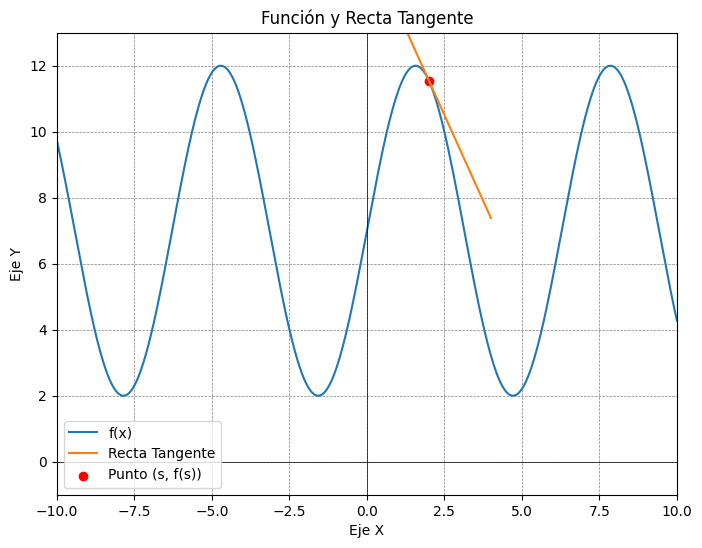

In [ ]:
# funcion que calcule la recta tangente que pase por f en el punto (s,f(s)) y grafica un ejemplo
# Calcula la derivada de f(x)
def df(x):
  return 5*np.cos(x)

# Función para calcular la recta tangente
def recta_tangente(s):
  m = df(s)  # Pendiente de la tangente
  b = f(s) - m * s  # Intersección con el eje y
  return m, b

# Ejemplo de uso
s = 2  # Punto donde queremos la tangente

m, b = recta_tangente(s)
print("La ecuación de la recta tangente en x =", s, "es: y =", m, "x +", b)

# Graficar la función y la recta tangente
x = np.linspace(-10, 10, 400)
y = f(x)

# Puntos de la recta tangente
x_tangente = np.linspace(s - 2, s + 2, 100)  # Rango alrededor del punto s
y_tangente = m * x_tangente + b

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x_tangente, y_tangente, label='Recta Tangente')
plt.scatter(s, f(s), color='red', label='Punto (s, f(s))')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función y Recta Tangente')
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-1, 13)
plt.show()


La ecuación de la recta tangente es: y = -2.08x + 5.16


## Intentos fallidos :(

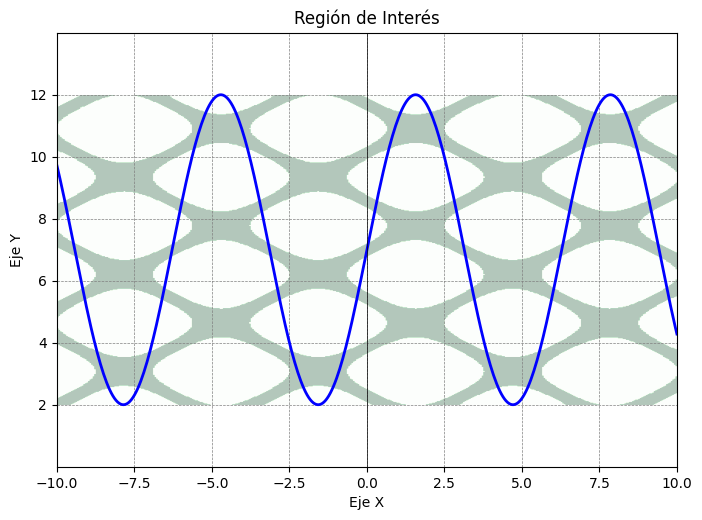

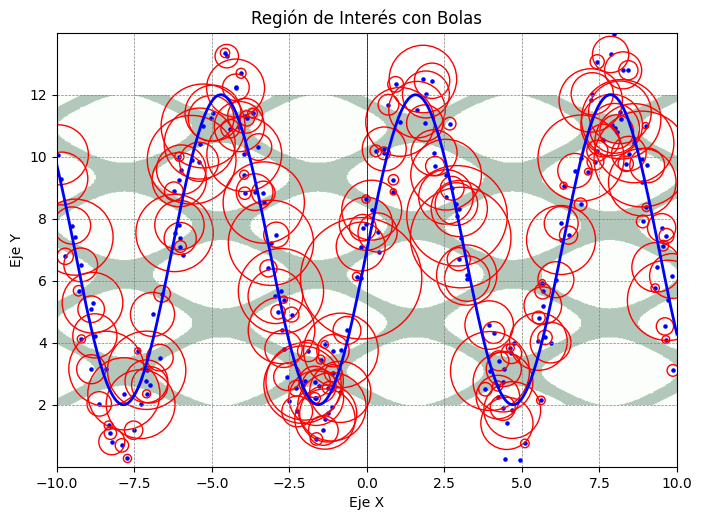

In [48]:

# Creamos una malla de puntos en el plano
x = np.linspace(-10, 10, 400)
y = 5*np.sin(x)+7
X, Y = np.meshgrid(x, y)

# Definimos las desigualdades
condicion1 = Y > 5*np.sin(X)+7 - 2  # 2 unidades debajo de la curva
condicion2 = Y < 5*np.sin(X)+7 + 2  # 2 unidades encima de la curva

# Combinamos las condiciones para la región deseada
region = np.logical_and(condicion1, condicion2)

# Generar puntos aleatorios dentro de la región
num_puntos = 200
puntos = []

while len(puntos) < num_puntos:
    x_i = np.random.uniform(-10, 10)
    y_i = np.random.uniform(5*np.sin(x_i)+7 - 2, 5*np.sin(x_i)+7 + 2)
    if (y_i > 5*np.sin(x_i)+7 - 2) and (y_i < 5*np.sin(x_i)+7 + 2):
        puntos.append((x_i, y_i))

# Calcular la distancia mínima de un punto al borde de la región
def distancia_minima_curva(punto):
    x, y = punto
    distancia_arriba = abs(y - (5*np.sin(x)+7 + 2))
    distancia_abajo = abs(y - (5*np.sin(x)+7 - 2))
    return min(distancia_arriba, distancia_abajo)

# Calcular radios para las bolas
radios = []
for punto in puntos:
    distancia = distancia_minima_curva(punto)
    if distancia < 0.1:
        rad = 0
    else:
        rad = random.uniform(0.1, distancia)
    radios.append(rad)


puntos_x, puntos_y = zip(*puntos)

for i in range(num_puntos):
    centro = puntos[i]
    radio = radios[i]
    circle = patches.Circle(centro, radio, color='red', fill=False)
    ax.add_patch(circle)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Región de Interés con Bolas')
plt.xlim(-10, 10)
plt.ylim((5*np.sin(x)+7).min() - 2, (5*np.sin(x)+7).max() + 2)
plt.show()
